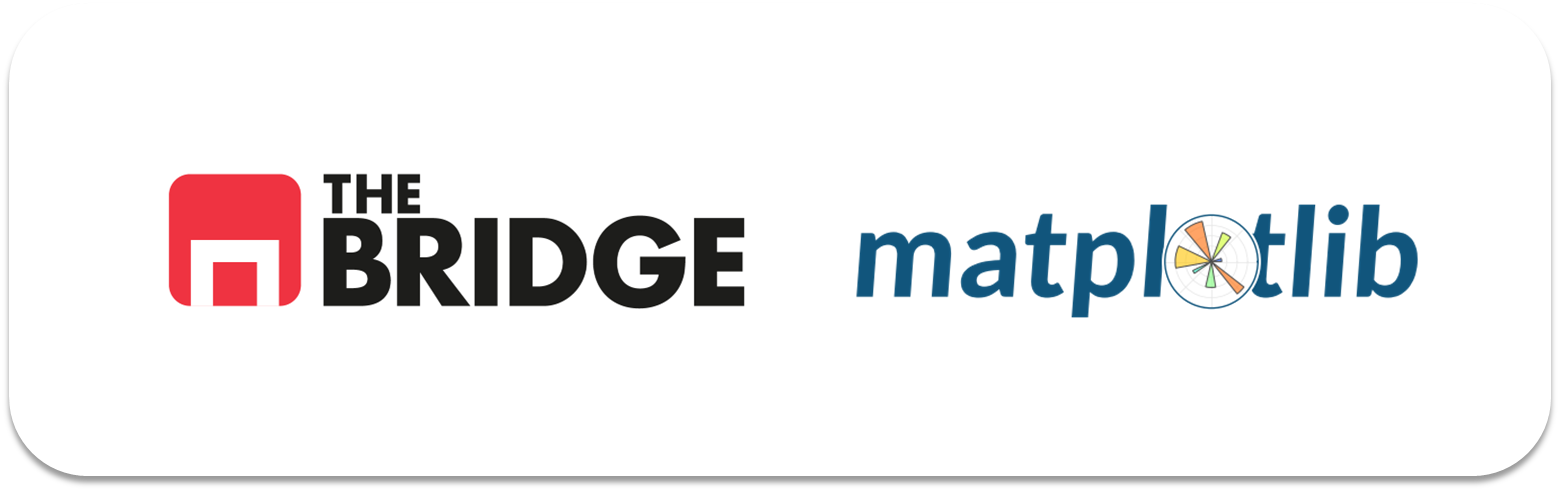

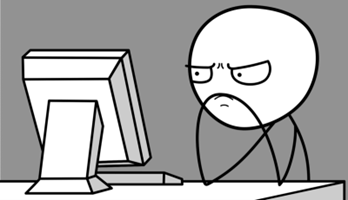

Para ejercitarte y afianzar lo aprendido sobre gráficas de Matplotlib, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-white")

import numpy as np
import pandas as pd


### Ejercicio 1


Carga tu qerido dataset del titanic, en la ruta "./data/titanic.csv", no hace falta que hagas limpieza.

In [3]:
df = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_8/Unidad_1/Workout/data/titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Ejercicio 2



Crea el histograma de la variable `age` de forma que se reproduzca la siguiente figura (tiene 30 bines)

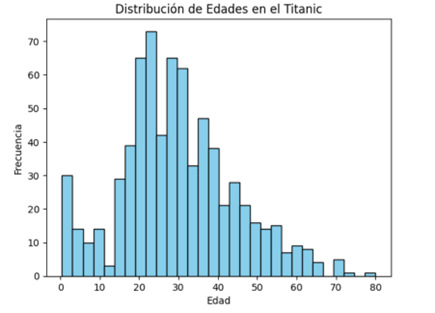

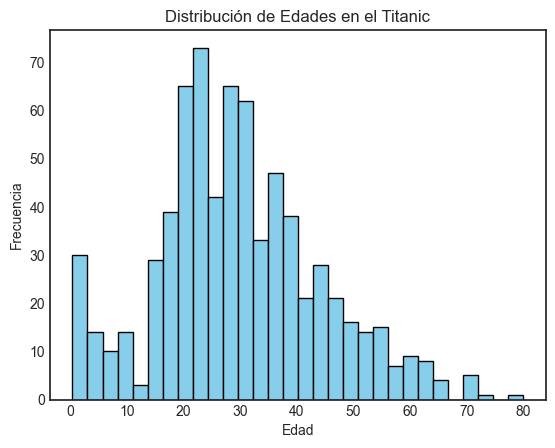

In [8]:
plt.hist(df["age"],bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de Edades en el Titanic")
plt.show()


### Ejercicio 3

¿Cuáles son los 3 intervalos de valores con mayor número de viajeros según el gráfico anterior? ¿Obtén también el número de viajeros en cada uno?

In [9]:
counts, bin_edges = np.histogram(df["age"].dropna(), bins=30)

# Obtener los tres intervalos con mayor número de viajeros
top_3_indices = counts.argsort()[-3:][::-1]  # Indices de los tres mayores valores, ordenados
top_3_intervals = [(bin_edges[i], bin_edges[i+1]) for i in top_3_indices]  # Intervalos correspondientes
top_3_counts = [counts[i] for i in top_3_indices]  # Frecuencias correspondientes

# Mostrar los resultados
for i, (interval, count) in enumerate(zip(top_3_intervals, top_3_counts)):
    print(f"{i+1}. Intervalo: {interval[0]:.1f} - {interval[1]:.1f}, Viajeros: {count}")


1. Intervalo: 21.6 - 24.3, Viajeros: 73
2. Intervalo: 19.0 - 21.6, Viajeros: 65
3. Intervalo: 26.9 - 29.6, Viajeros: 65


### Ejercicio 4

Obten el diagrama de caja del precio del billete usando las funciones de matplotlib y reproduciendo la siguiente figura (tendrás que bucear un poco en los parámetros, y usar patch_artist = True, el tamaño de los bigotes está ajustado a 3 IQRs):

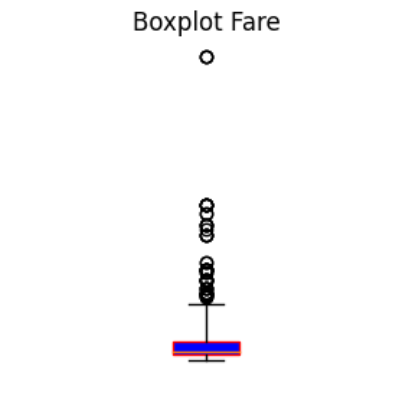

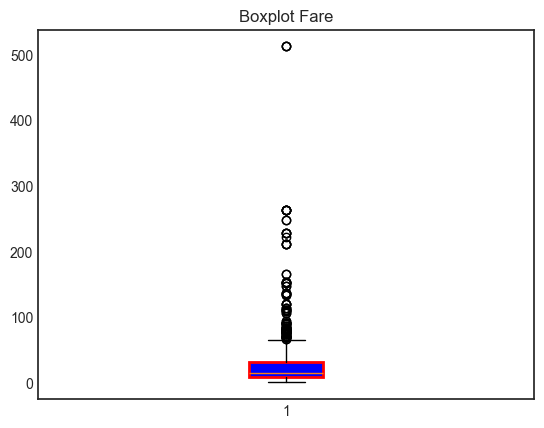

In [ ]:
box = plt.boxplot(df["fare"],patch_artist=True,boxprops=dict(color="red", linewidth=2))

for patch in box["boxes"]:

    patch.set(facecolor="blue")

plt.title("Boxplot Fare")
plt.show();

### Ejercicio 5

Crea el gráfico de frecuencias absolutas y relativas de las ciudades de embarque del Titanic de forma que repodruzcan la siguiente figura:

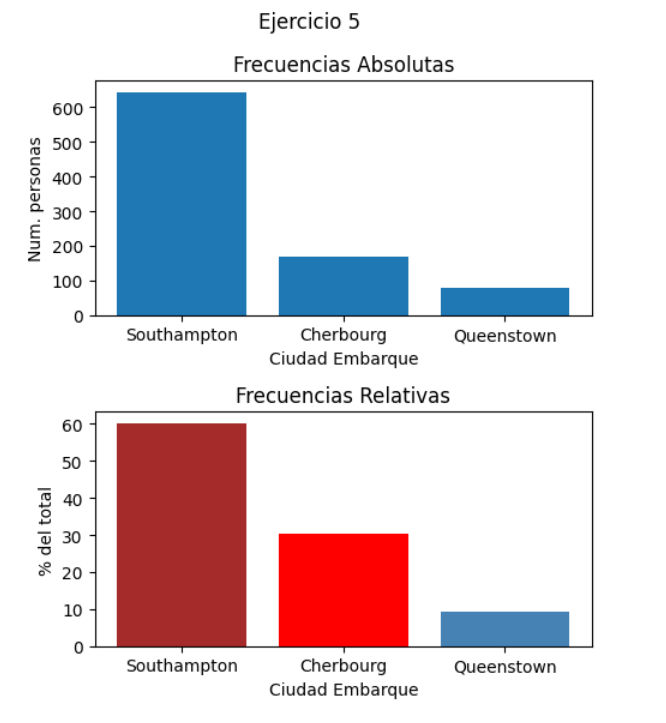

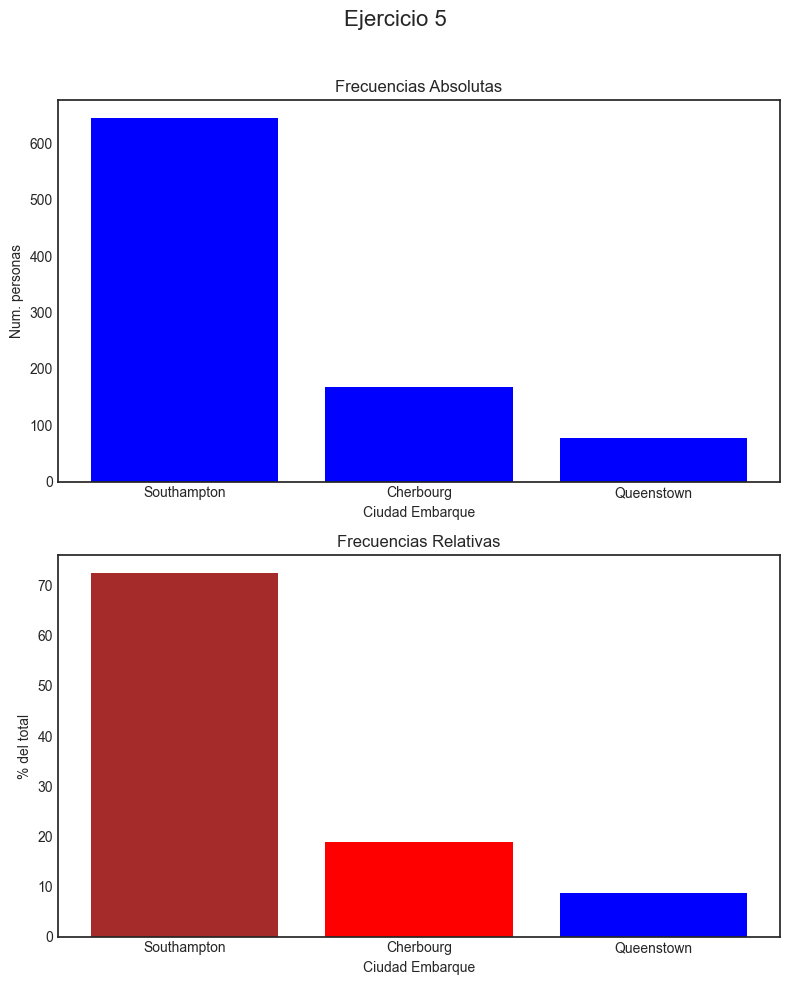

In [17]:
# Calcular frecuencias absolutas y relativas
frecuencias_absolutas = df['embark_town'].value_counts()
frecuencias_relativas = df['embark_town'].value_counts(normalize=True) * 100

# Crear la figura con dos subgráficos
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Gráfico de frecuencias absolutas
axes[0].bar(frecuencias_absolutas.index, frecuencias_absolutas.values, color="blue")
axes[0].set_title("Frecuencias Absolutas")
axes[0].set_xlabel("Ciudad Embarque")
axes[0].set_ylabel("Num. personas")

# Gráfico de frecuencias relativas
axes[1].bar(frecuencias_relativas.index, frecuencias_relativas.values, color=["brown", "red", "blue"])
axes[1].set_title("Frecuencias Relativas")
axes[1].set_xlabel("Ciudad Embarque")
axes[1].set_ylabel("% del total")

# Título general para toda la figura
fig.suptitle("Ejercicio 5", fontsize=16)

# Ajustar los espacios entre gráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar el gráfico
plt.show()


### Ejercicio 6

Crea el gráfico de dispersión entre el precio y la edad, de forma que reproduzca el siguiente gráfico (tendrás que emplear el argumento alpa)

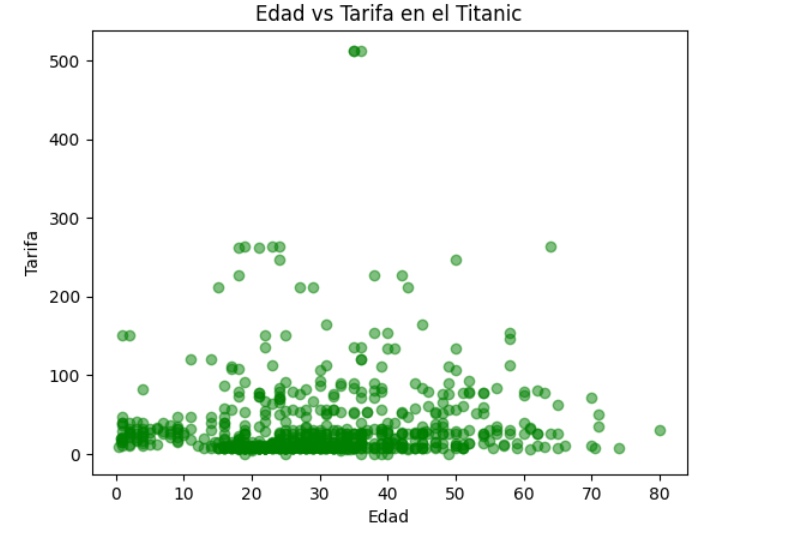

Text(0, 0.5, 'Tarifa')

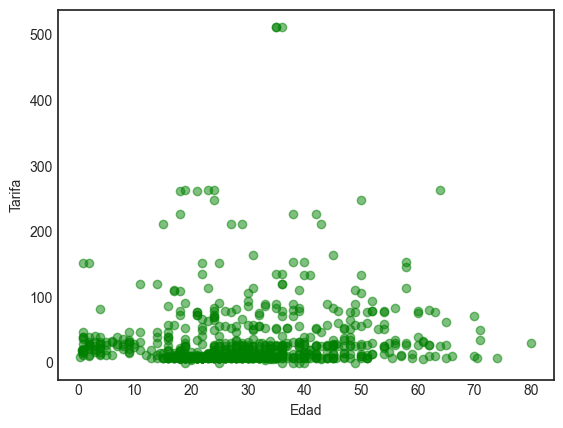

In [20]:
plt.scatter(df["age"],df["fare"],alpha = 0.5, c="g" )
plt.xlabel("Edad")
plt.ylabel("Tarifa")

### Ejercicio 7

Vamos a obtener el precio medio por edad, de la siguiente forma agrupa por edad y calcula la media de la tarifa, luego haz lo mismo pero calculando la desviación de estándar. Guarda los resultados en dos variables distintas.

In [21]:
# Calcular el precio medio por edad
precio_medio_por_edad = df.groupby("age")["fare"].mean()

# Calcular la desviación estándar por edad
desviacion_estandar_por_edad = df.groupby("age")["fare"].std()

# Mostrar los resultados
print("Precio medio por edad:")
print(precio_medio_por_edad)

print("\nDesviación estándar por edad:")
print(desviacion_estandar_por_edad)

Precio medio por edad:
age
0.42       8.5167
0.67      14.5000
0.75      19.2583
0.83      23.8750
0.92     151.5500
           ...   
70.00     40.7500
70.50      7.7500
71.00     42.0792
74.00      7.7750
80.00     30.0000
Name: fare, Length: 88, dtype: float64

Desviación estándar por edad:
age
0.42           NaN
0.67           NaN
0.75      0.000000
0.83      7.247845
0.92           NaN
           ...    
70.00    42.779960
70.50          NaN
71.00    10.500536
74.00          NaN
80.00          NaN
Name: fare, Length: 88, dtype: float64


### Ejercicio 8

Considerando las medias como un conjunto de medidas y las desviaciones como el error de las mismas construye un diagrama de errores que reproduzca la siguiente figura, usando (£) como moneda:

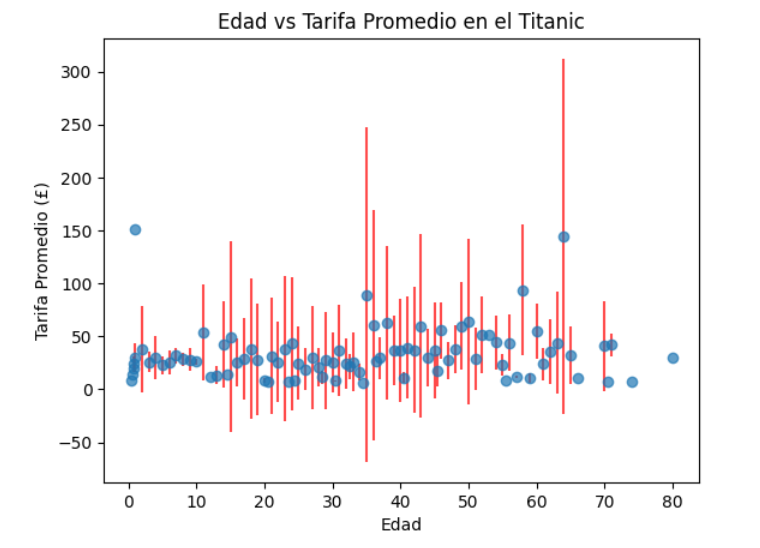

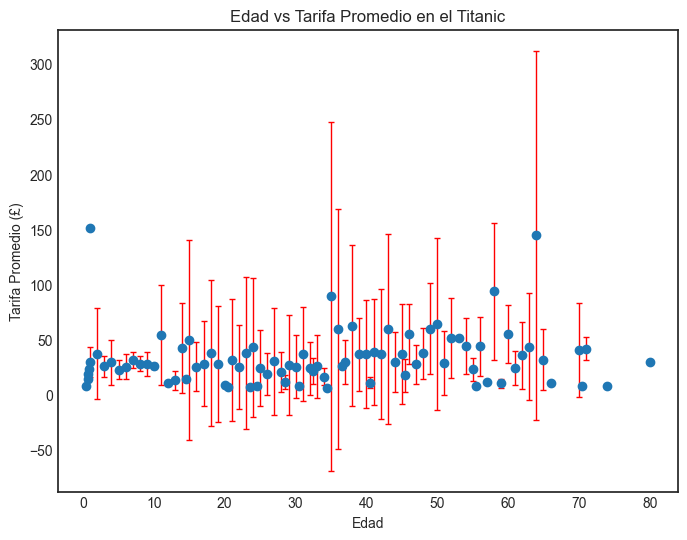

In [22]:
plt.figure(figsize=(8, 6))
plt.errorbar(
    precio_medio_por_edad.index,  # Edad
    precio_medio_por_edad.values,  # Tarifa promedio
    yerr=desviacion_estandar_por_edad.values,  # Desviación estándar como error
    fmt="o",  # Formato de los puntos (círculos)
    ecolor="red",  # Color de las barras de error
    elinewidth=1,  # Grosor de las barras de error
    capsize=2,  # Tamaño de las "caps" en las barras de error
)

plt.title("Edad vs Tarifa Promedio en el Titanic")
plt.xlabel("Edad")
plt.ylabel("Tarifa Promedio (£)")

plt.show()

EXTRA: Pinta los cuatro primeros gráficos conjuntamente en una sóla figura como la que ves a continuación:

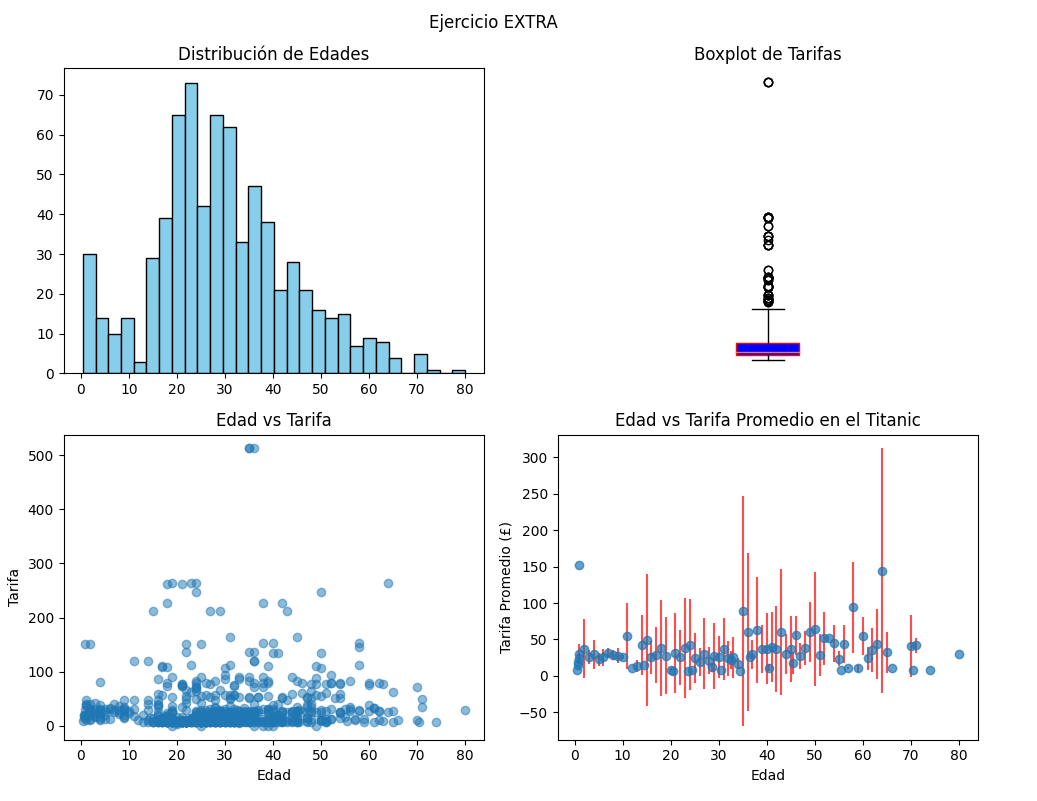

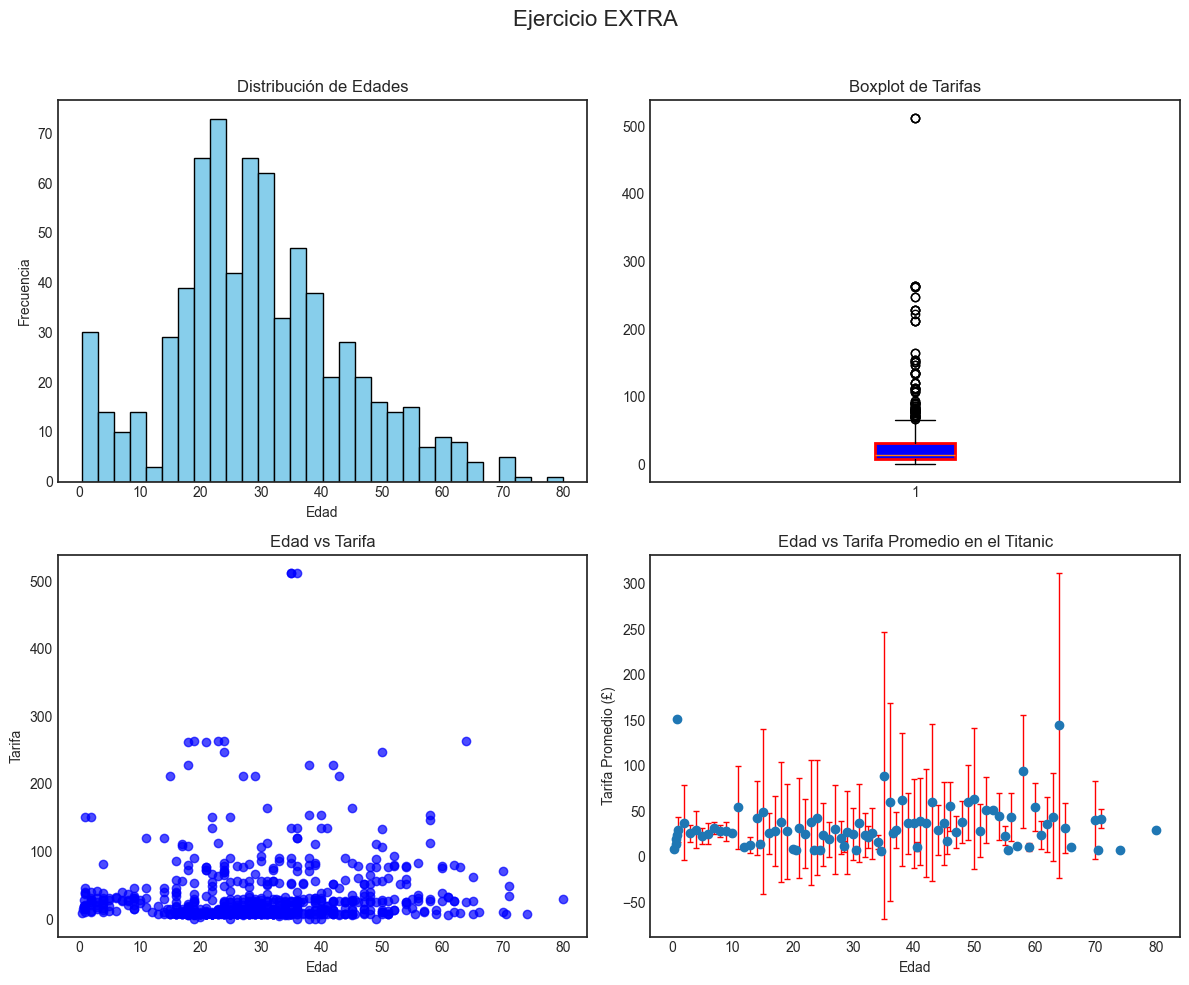

In [24]:
# Figura y subgráficos: 2 filas x 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico 1: Histograma (Distribución de Edades)
axes[0, 0].hist(df["age"].dropna(), bins=30, color="skyblue", edgecolor="black")
axes[0, 0].set_title("Distribución de Edades")
axes[0, 0].set_xlabel("Edad")
axes[0, 0].set_ylabel("Frecuencia")

# Gráfico 2: Boxplot (Tarifas)
box = axes[0, 1].boxplot(df["fare"].dropna(), patch_artist=True, boxprops=dict(color="red", linewidth=2))
for patch in box['boxes']:
    patch.set(facecolor="blue")  # Interior de la caja
axes[0, 1].set_title("Boxplot de Tarifas")

# Gráfico 3: Scatterplot (Edad vs Tarifa)
axes[1, 0].scatter(df["age"], df["fare"], alpha=0.7, color="blue")
axes[1, 0].set_title("Edad vs Tarifa")
axes[1, 0].set_xlabel("Edad")
axes[1, 0].set_ylabel("Tarifa")

# Gráfico 4: Errorbar (Edad vs Tarifa Promedio)
axes[1, 1].errorbar(
    precio_medio_por_edad.index,  # Edad
    precio_medio_por_edad.values,  # Tarifa promedio
    yerr=desviacion_estandar_por_edad.values,  # Desviación estándar
    fmt="o", ecolor="red", elinewidth=1, capsize=2
)
axes[1, 1].set_title("Edad vs Tarifa Promedio en el Titanic")
axes[1, 1].set_xlabel("Edad")
axes[1, 1].set_ylabel("Tarifa Promedio (£)")

fig.suptitle("Ejercicio EXTRA", fontsize=16)

# Ajustar el espacio entre subgráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()